In [45]:
%config InlineBackend.figure_format = 'retina'
%load_ext watermark
%watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2024-07-18T18:15:15.188429-04:00

Python implementation: CPython
Python version       : 3.12.2
IPython version      : 8.22.2

Compiler    : MSC v.1937 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 167 Stepping 1, GenuineIntel
CPU cores   : 16
Architecture: 64bit



In [46]:
# Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm

import os

from func_utils import *

# Display and graph options

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

# Customize the font and title size
custom_params = {
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "font.family": "Arial"
}
sns.set_context("notebook", rc=custom_params)

# Set a color palette
sns.set_palette("Set2") 

# Set global option to display numbers in plain format
pd.set_option('display.float_format', '{:.2f}'.format)

# Filter warnings and seeds
import warnings
import random

warnings.filterwarnings('ignore')
random.seed(1234)

In [47]:
# Data 

CustomerData = pd.read_excel('DATA/CustomersData.xlsx')
Discount_Coupon = pd.read_csv('DATA/Discount_Coupon.csv')
Marketing_Spend = pd.read_csv('DATA/Marketing_Spend.csv')
Online_Sales = pd.read_csv('DATA/Online_Sales.csv')
Tax_amount = pd.read_excel('DATA/Tax_amount.xlsx')

In [48]:
## EDA Basic

display(CustomerData.head())
display(Discount_Coupon.head())
display(Marketing_Spend.head())
display(Online_Sales.head())
display(Tax_amount.head())


,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used


,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [49]:
display(CustomerData.info())
display(Discount_Coupon.info())
display(Marketing_Spend.info())
display(Online_Sales.info())
display(Tax_amount.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


None

In [50]:
display(CustomerData.duplicated().sum())
display(Discount_Coupon.duplicated().sum())
display(Marketing_Spend.duplicated().sum())
display(Online_Sales.duplicated().sum())
display(Tax_amount.duplicated().sum())

0

0

0

0

0

In [51]:
display(CustomerData.isna().sum())
display(Discount_Coupon.isna().sum())
display(Marketing_Spend.isna().sum())
display(Online_Sales.isna().sum())
display(Tax_amount.isna().sum())

CustomerID       0
Gender           0
Location         0
Tenure_Months    0
dtype: int64

Month               0
Product_Category    0
Coupon_Code         0
Discount_pct        0
dtype: int64

Date             0
Offline_Spend    0
Online_Spend     0
dtype: int64

CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
dtype: int64

Product_Category    0
GST                 0
dtype: int64

# EDA

Tip: question 1 -Calculate Invoice amount or sale_amount or revenue for each transaction and item level 
$$ Invoice Value =[\frac{Quantity*Avg\_price}{(1-Discount\_pct)}*(1+GST)]+Delivery\_Charges$$

## 1. Understanding the variables used to calculate InvoiceValue

In [52]:
# Quantity and Avg_Price

display(Online_Sales[['Quantity', 'Avg_Price', 'Delivery_Charges']].describe())
print(Online_Sales[['Quantity', 'Avg_Price', 'Delivery_Charges']].corr())

,Quantity,Avg_Price,Delivery_Charges
count,52924.00,52924.00,52924.00
mean,4.50,52.24,10.52
std,20.10,64.01,19.48
min,1.00,0.39,0.00
25%,1.00,5.70,6.00
50%,1.00,16.99,6.00
75%,2.00,102.13,6.50
max,900.00,355.74,521.36


                  Quantity  Avg_Price  Delivery_Charges
Quantity              1.00      -0.11              0.19
Avg_Price            -0.11       1.00             -0.11
Delivery_Charges      0.19      -0.11              1.00


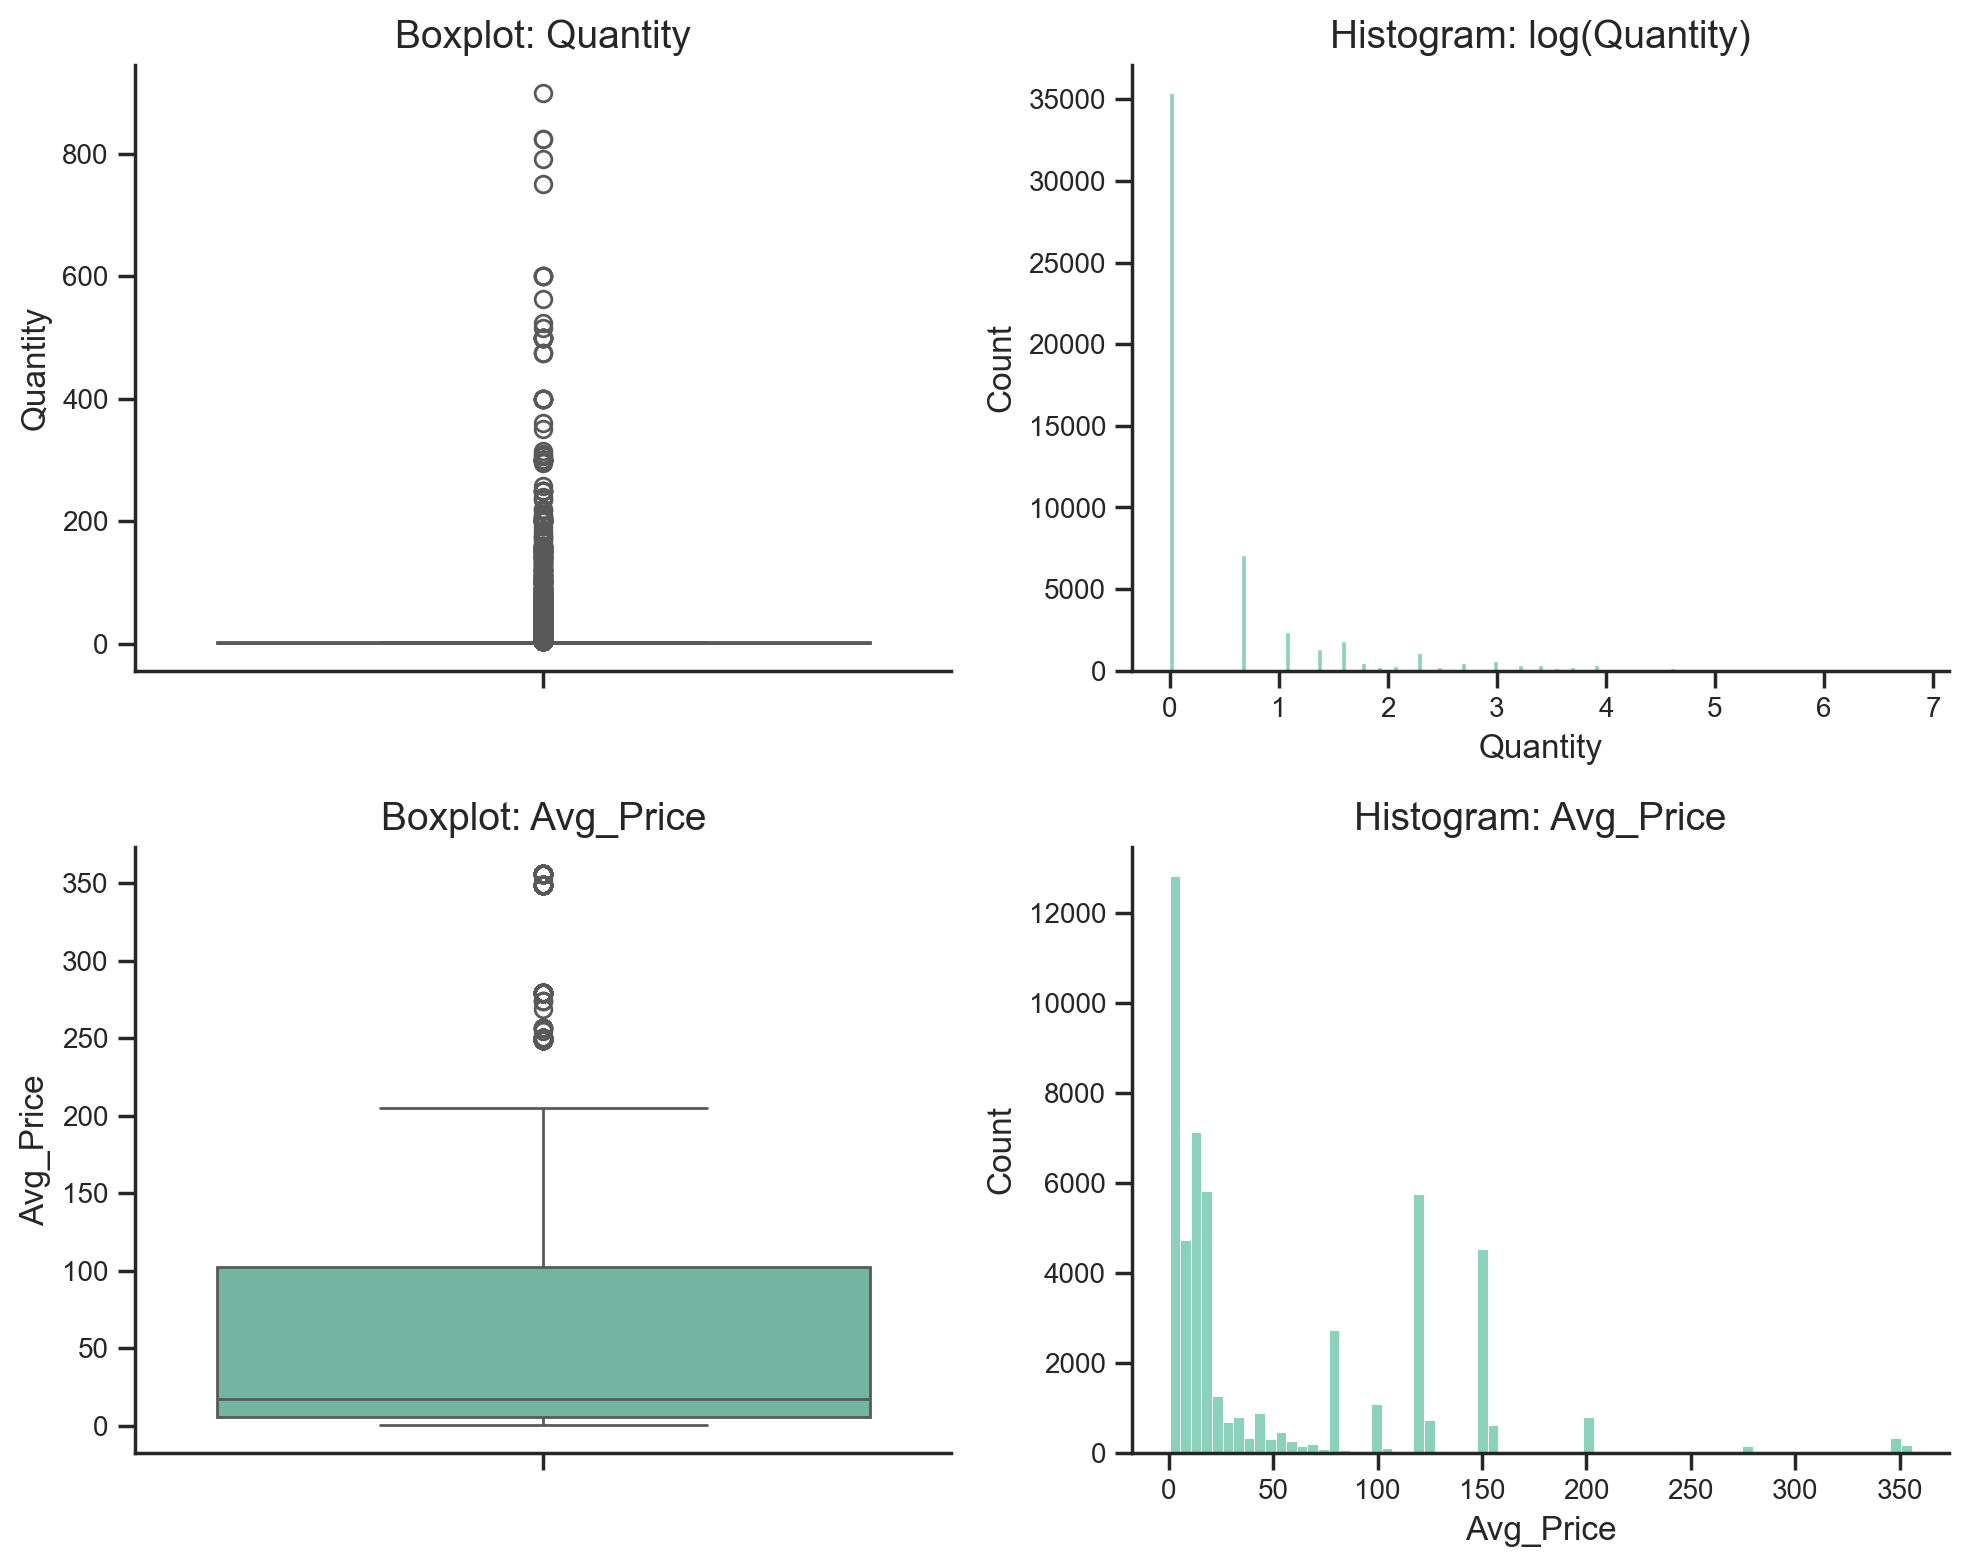

In [53]:
# Graphs for Quantity and Avg_Price

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Boxplot for Quantity
f1 = sns.boxplot(Online_Sales['Quantity'], ax=axes[0, 0])
f1.set_title('Boxplot: Quantity')

# Histogram for Quantity
f2 = sns.histplot(np.log(Online_Sales['Quantity']), ax=axes[0, 1])
f2.set_title('Histogram: log(Quantity)')

# Boxplot for Avg_Price
f3 = sns.boxplot(Online_Sales['Avg_Price'], ax=axes[1, 0])
f3.set_title('Boxplot: Avg_Price')

# Histogram for Avg_Price
f4 = sns.histplot(Online_Sales['Avg_Price'], ax=axes[1, 1])
f4.set_title('Histogram: Avg_Price')

plt.tight_layout()
plt.show()

- Create a new_var to identy the outliers and to use a diferent colors to show in a scatterplot

In [54]:
detect_outliers(Online_Sales, 'Quantity')

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Outlier
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,NO
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,NO
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,NO
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,YES
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,NO
...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,12/31/2019,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,NO
52920,14410,48494,12/31/2019,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,NO
52921,14410,48495,12/31/2019,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,NO
52922,14600,48496,12/31/2019,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,YES


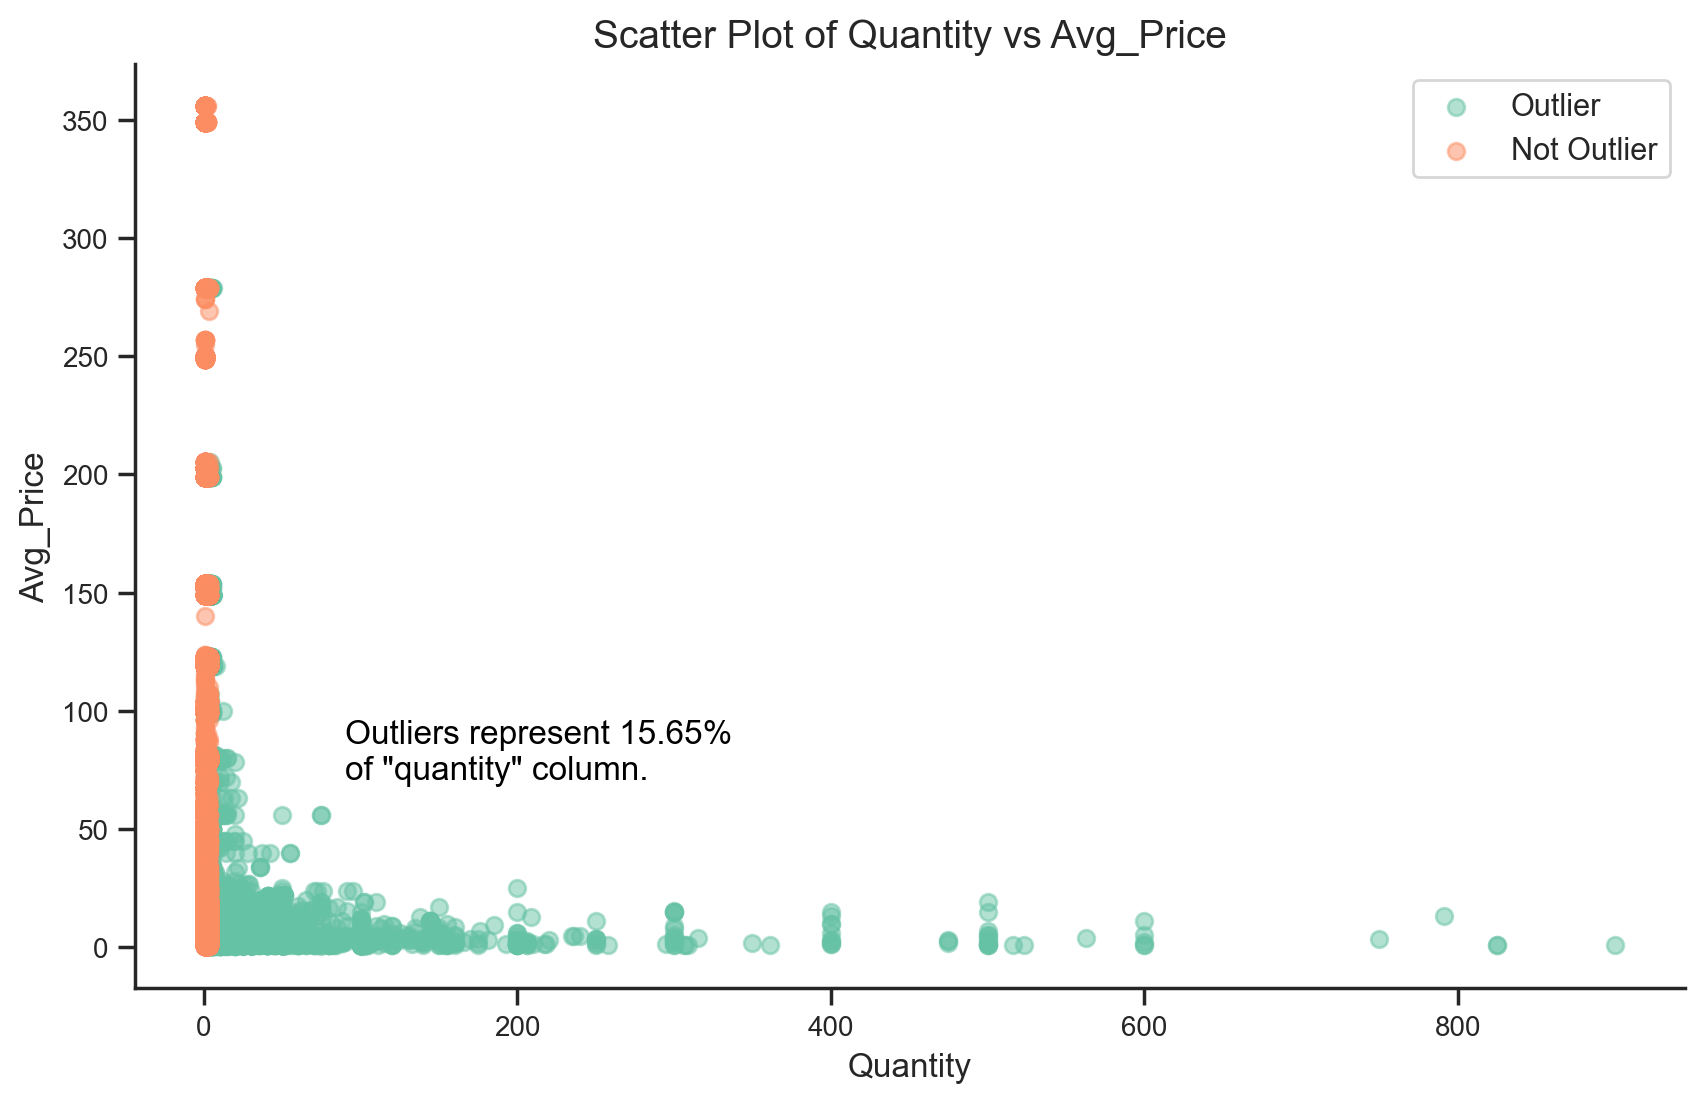

In [55]:
# Proportion of outliers
outlier_proportion = (Online_Sales['Outlier'] == 'YES').mean() * 100

plt.figure(figsize=(10,6))


# Plot outliers
plt.scatter(Online_Sales[Online_Sales['Outlier'] == 'YES']['Quantity'],
            Online_Sales[Online_Sales['Outlier'] == 'YES']['Avg_Price'],
            label = 'Outlier', alpha=.5)

# Plot no-outliers
plt.scatter(Online_Sales[Online_Sales['Outlier'] == 'NO']['Quantity'],
            Online_Sales[Online_Sales['Outlier'] == 'NO']['Avg_Price'],
            label = 'Not Outlier', alpha=.5)

# Add text annotation
plt.text(x=max(Online_Sales['Quantity']) * 0.1, 
         y=max(Online_Sales['Avg_Price']) * 0.2, 
         s=f'Outliers represent {outlier_proportion:.2f}%\nof "quantity" column.', 
         fontsize=12, color='black')

plt.xlabel('Quantity')
plt.ylabel('Avg_Price')
plt.title('Scatter Plot of Quantity vs Avg_Price')
plt.legend()
plt.show()


In [56]:
Online_Sales[Online_Sales['Outlier'] == 'YES'].sort_values('Quantity', ascending= False)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Outlier
42456,14541,40835,10/16/2019,GGOEGGOA017399,Maze Pen,Office,900,0.99,12.99,Used,YES
21364,17858,29898,6/8/2019,GGOEGGOA017399,Maze Pen,Office,825,0.79,85.33,Used,YES
20992,16782,29657,6/5/2019,GGOEGGOA017399,Maze Pen,Office,825,0.79,85.33,Used,YES
30192,15194,34429,8/2/2019,GGOEGHPJ080310,Google Blackout Cap,Headgear,791,13.29,6.00,Used,YES
12173,13113,24863,4/5/2019,GGOEGHGH019699,Google Sunglasses,Lifestyle,750,3.50,6.50,Used,YES
...,...,...,...,...,...,...,...,...,...,...,...
18295,14085,28170,5/16/2019,GGOEGAWQ062948,Google Baby Essentials Set,Apparel,4,27.19,6.50,Used,YES
18296,14085,28170,5/16/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,4,2.39,6.50,Clicked,YES
18302,14085,28170,5/16/2019,GGOEYFKQ020699,YouTube Custom Decals,Office,4,1.59,6.50,Used,YES
42100,15039,40614,10/13/2019,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,4,119.00,6.00,Used,YES


- Looking at the outliers, 15% of the values are considering outliers according the Boxplot. A glance at this data, quantities equal or higer than 4 are considering outliers. Plotting a scatterplot, we can see a concentration of these data in a lower 'avg_price'.
- There is no evidencies of a wrong registers or invalid numbers.
- For calculate the Income, I will use the data without removing these values because they seems a possible values for a e-commerce.

In [57]:
# Discount_pct

proportion_calc(Discount_Coupon, 'Discount_pct')

,Discount_pct,count,prop
0,10,68,33.33
1,20,68,33.33
2,30,68,33.33


In [58]:
# GST
proportion_calc(Tax_amount, 'GST')

,GST,count,prop
0,0.10,7,35.00
1,0.18,7,35.00
2,0.05,5,25.00
3,0.12,1,5.00


In [59]:
# Delivery Charge
Online_Sales['Delivery_Charges'].describe()

count   52924.00
mean       10.52
std        19.48
min         0.00
25%         6.00
50%         6.00
75%         6.50
max       521.36
Name: Delivery_Charges, dtype: float64

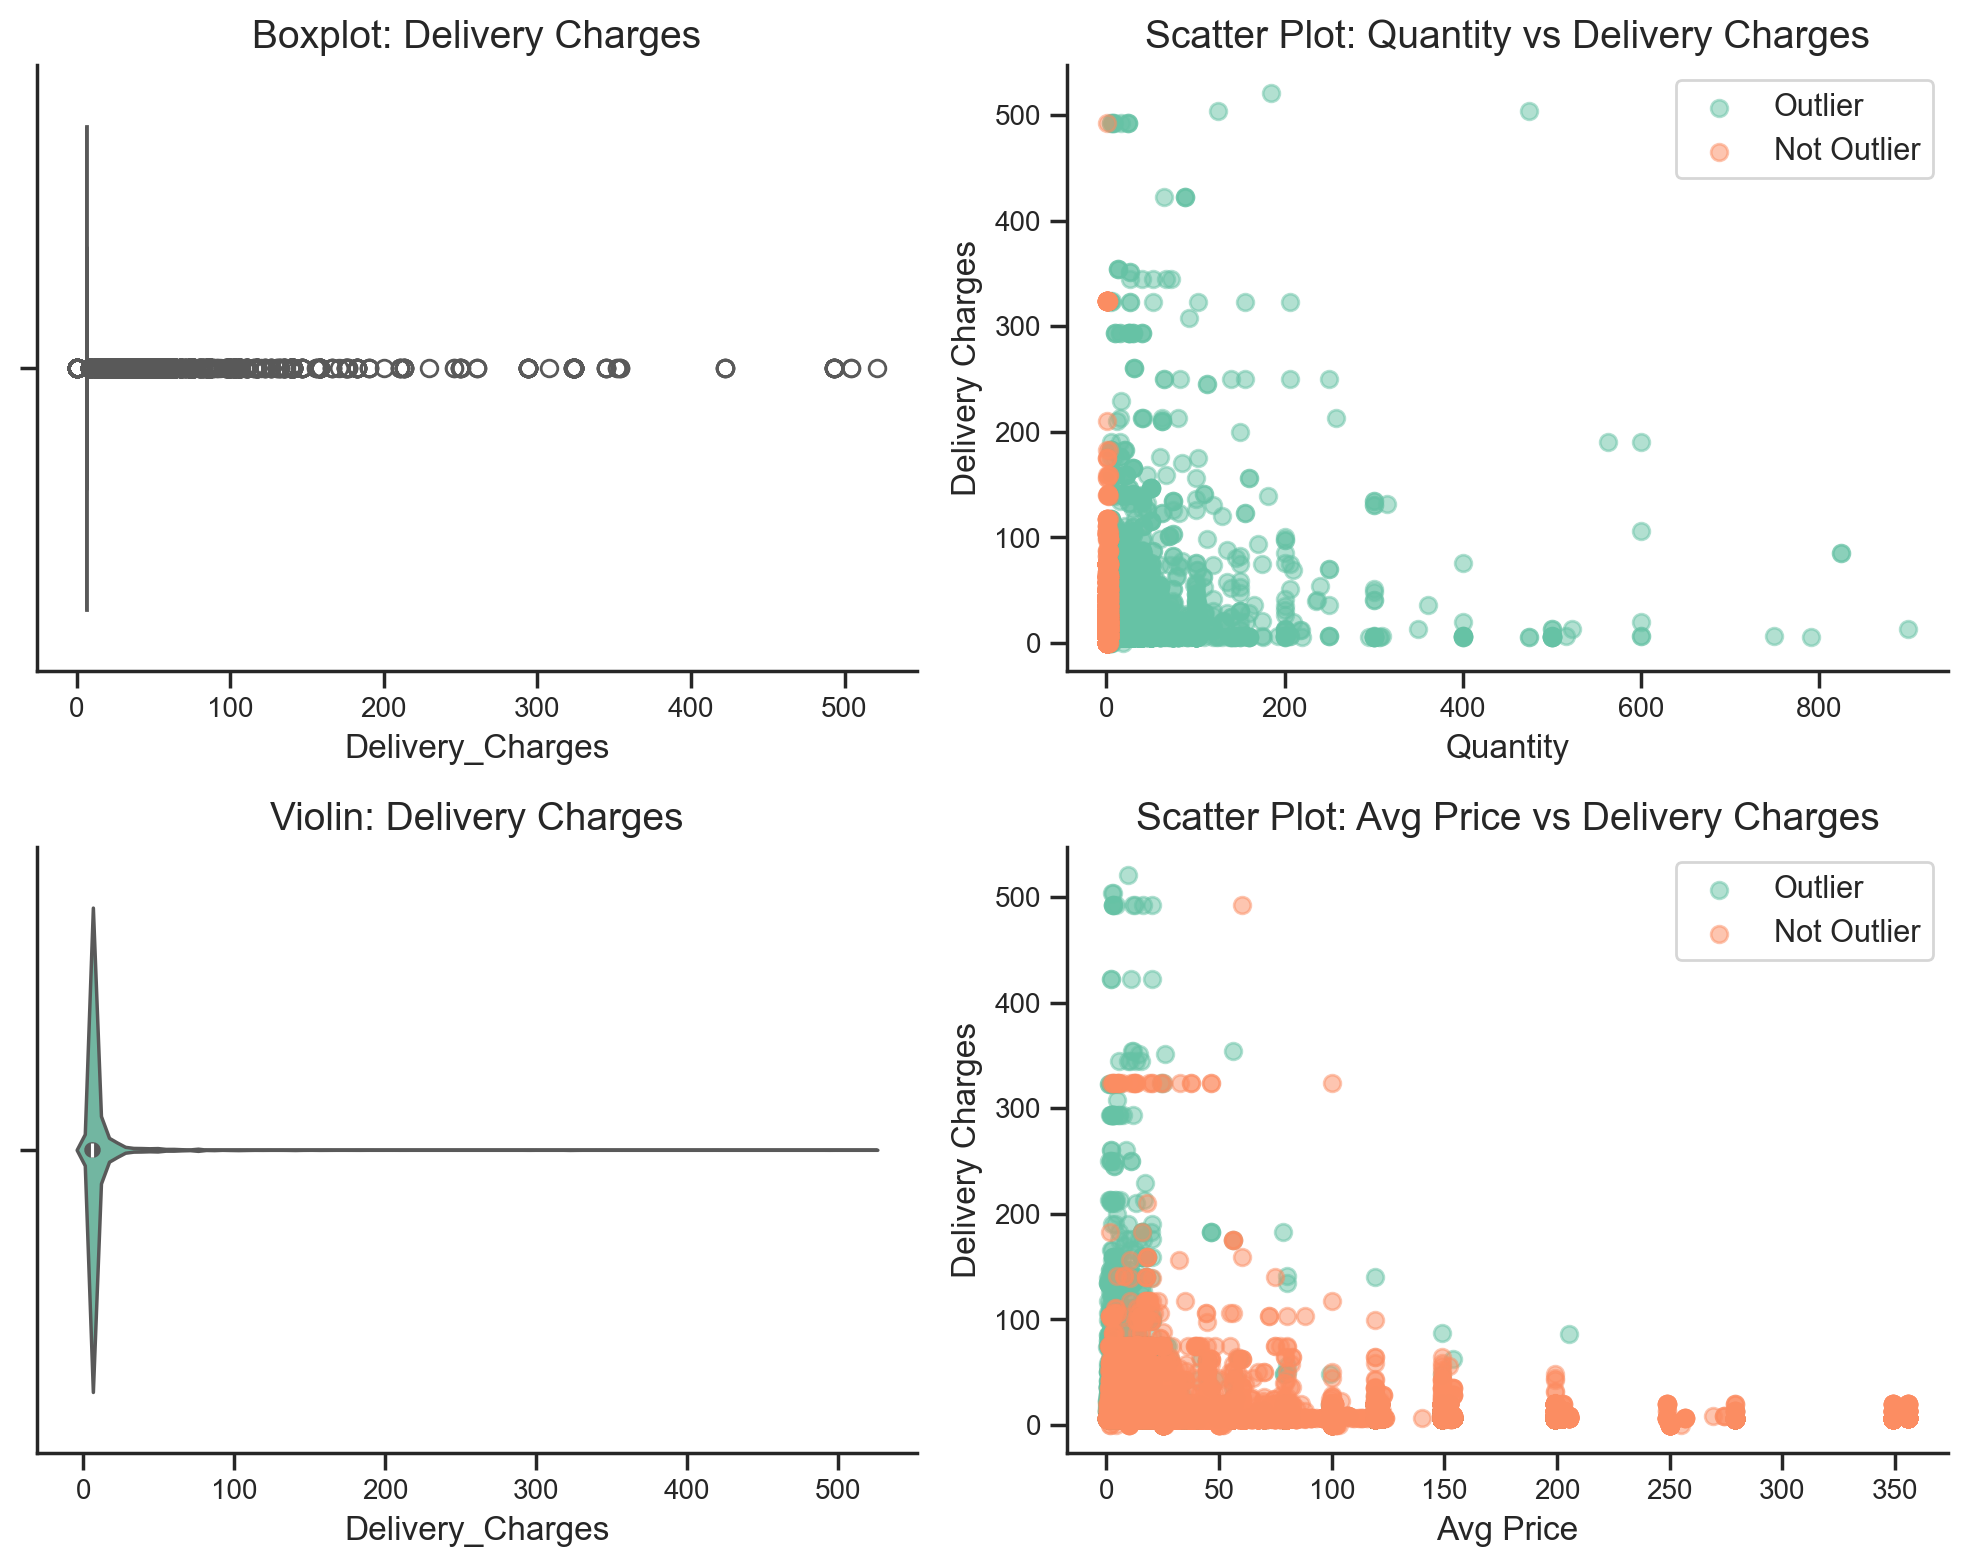

In [60]:
# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Boxplot for Delivery_Charges
sns.boxplot(x=Online_Sales['Delivery_Charges'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot: Delivery Charges')

# Scatter plot for Outliers and Not Outliers
axes[0, 1].scatter(Online_Sales[Online_Sales['Outlier'] == 'YES']['Quantity'],
                   Online_Sales[Online_Sales['Outlier'] == 'YES']['Delivery_Charges'],
                   label='Outlier', alpha=0.5)

axes[0, 1].scatter(Online_Sales[Online_Sales['Outlier'] == 'NO']['Quantity'],
                   Online_Sales[Online_Sales['Outlier'] == 'NO']['Delivery_Charges'],
                   label='Not Outlier', alpha=0.5)

axes[0, 1].set_title('Scatter Plot: Quantity vs Delivery Charges')
axes[0, 1].set_xlabel('Quantity')
axes[0, 1].set_ylabel('Delivery Charges')
axes[0, 1].legend()

# Add other plots as needed
# Example: Boxplot and Scatter plot for Avg_Price and Delivery_Charges
sns.violinplot(x=Online_Sales['Delivery_Charges'], ax=axes[1, 0])
axes[1, 0].set_title('Violin: Delivery Charges')

axes[1, 1].scatter(Online_Sales[Online_Sales['Outlier'] == 'YES']['Avg_Price'],
                   Online_Sales[Online_Sales['Outlier'] == 'YES']['Delivery_Charges'],
                   label='Outlier', alpha=0.5)

axes[1, 1].scatter(Online_Sales[Online_Sales['Outlier'] == 'NO']['Avg_Price'],
                   Online_Sales[Online_Sales['Outlier'] == 'NO']['Delivery_Charges'],
                   label='Not Outlier', alpha=0.5)

axes[1, 1].set_title('Scatter Plot: Avg Price vs Delivery Charges')
axes[1, 1].set_xlabel('Avg Price')
axes[1, 1].set_ylabel('Delivery Charges')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

### 2.1. Understanding how many customers acquired every month and Location

In [61]:
data_tmp = pd.merge(Online_Sales, CustomerData, how='left', on='CustomerID')
data_tmp

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Outlier,Gender,Location,Tenure_Months
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,NO,M,Chicago,12
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,NO,M,Chicago,12
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,NO,M,Chicago,12
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,YES,M,Chicago,12
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,NO,M,Chicago,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,12/31/2019,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,NO,F,New York,45
52920,14410,48494,12/31/2019,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,NO,F,New York,45
52921,14410,48495,12/31/2019,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,NO,F,New York,45
52922,14600,48496,12/31/2019,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,YES,F,California,7


In [62]:
# Month

data_tmp['Transaction_Date'] = pd.to_datetime(data_tmp['Transaction_Date'])
data_tmp['month'] = data_tmp['Transaction_Date'].dt.month
data_tmp


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Outlier,Gender,Location,Tenure_Months,month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,NO,M,Chicago,12,1
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,NO,M,Chicago,12,1
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,NO,M,Chicago,12,1
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,YES,M,Chicago,12,1
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,NO,M,Chicago,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,NO,F,New York,45,12
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,NO,F,New York,45,12
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,NO,F,New York,45,12
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,YES,F,California,7,12


In [63]:
## Customer Location

proportion_calc(CustomerData, 'Location')

,Location,count,prop
0,California,464,31.61
1,Chicago,456,31.06
2,New York,324,22.07
3,New Jersey,149,10.15
4,Washington DC,75,5.11


In [64]:
data_tmp['Transaction_Date'].describe()

count                            52924
mean     2019-07-05 19:16:09.450532864
min                2019-01-01 00:00:00
25%                2019-04-12 00:00:00
50%                2019-07-13 00:00:00
75%                2019-09-27 00:00:00
max                2019-12-31 00:00:00
Name: Transaction_Date, dtype: object

### 3. Sales by month and product

In [65]:
# Calling the data that I made for answering the question 1 just to not repeat all process that I did

data_tmp = pd.read_csv('DATA/base_main.csv')

- The data represents a period from 01/01/2019 to 12/31/2019.

In [68]:
invoice_categories = data_tmp[['Transaction_Date', 'Invoice','Product_Category', 'month']]
invoice_categories = invoice_categories.groupby(['Product_Category', 'month'])['Invoice'].agg(sum).reset_index()
invoice_categories

,Product_Category,month,Invoice
0,Accessories,1,63.23
1,Accessories,3,72.49
2,Accessories,4,214.77
3,Accessories,5,236.42
4,Accessories,6,312.77
...,...,...,...
202,Waze,8,1176.19
203,Waze,9,838.85
204,Waze,10,1335.71
205,Waze,11,1800.55


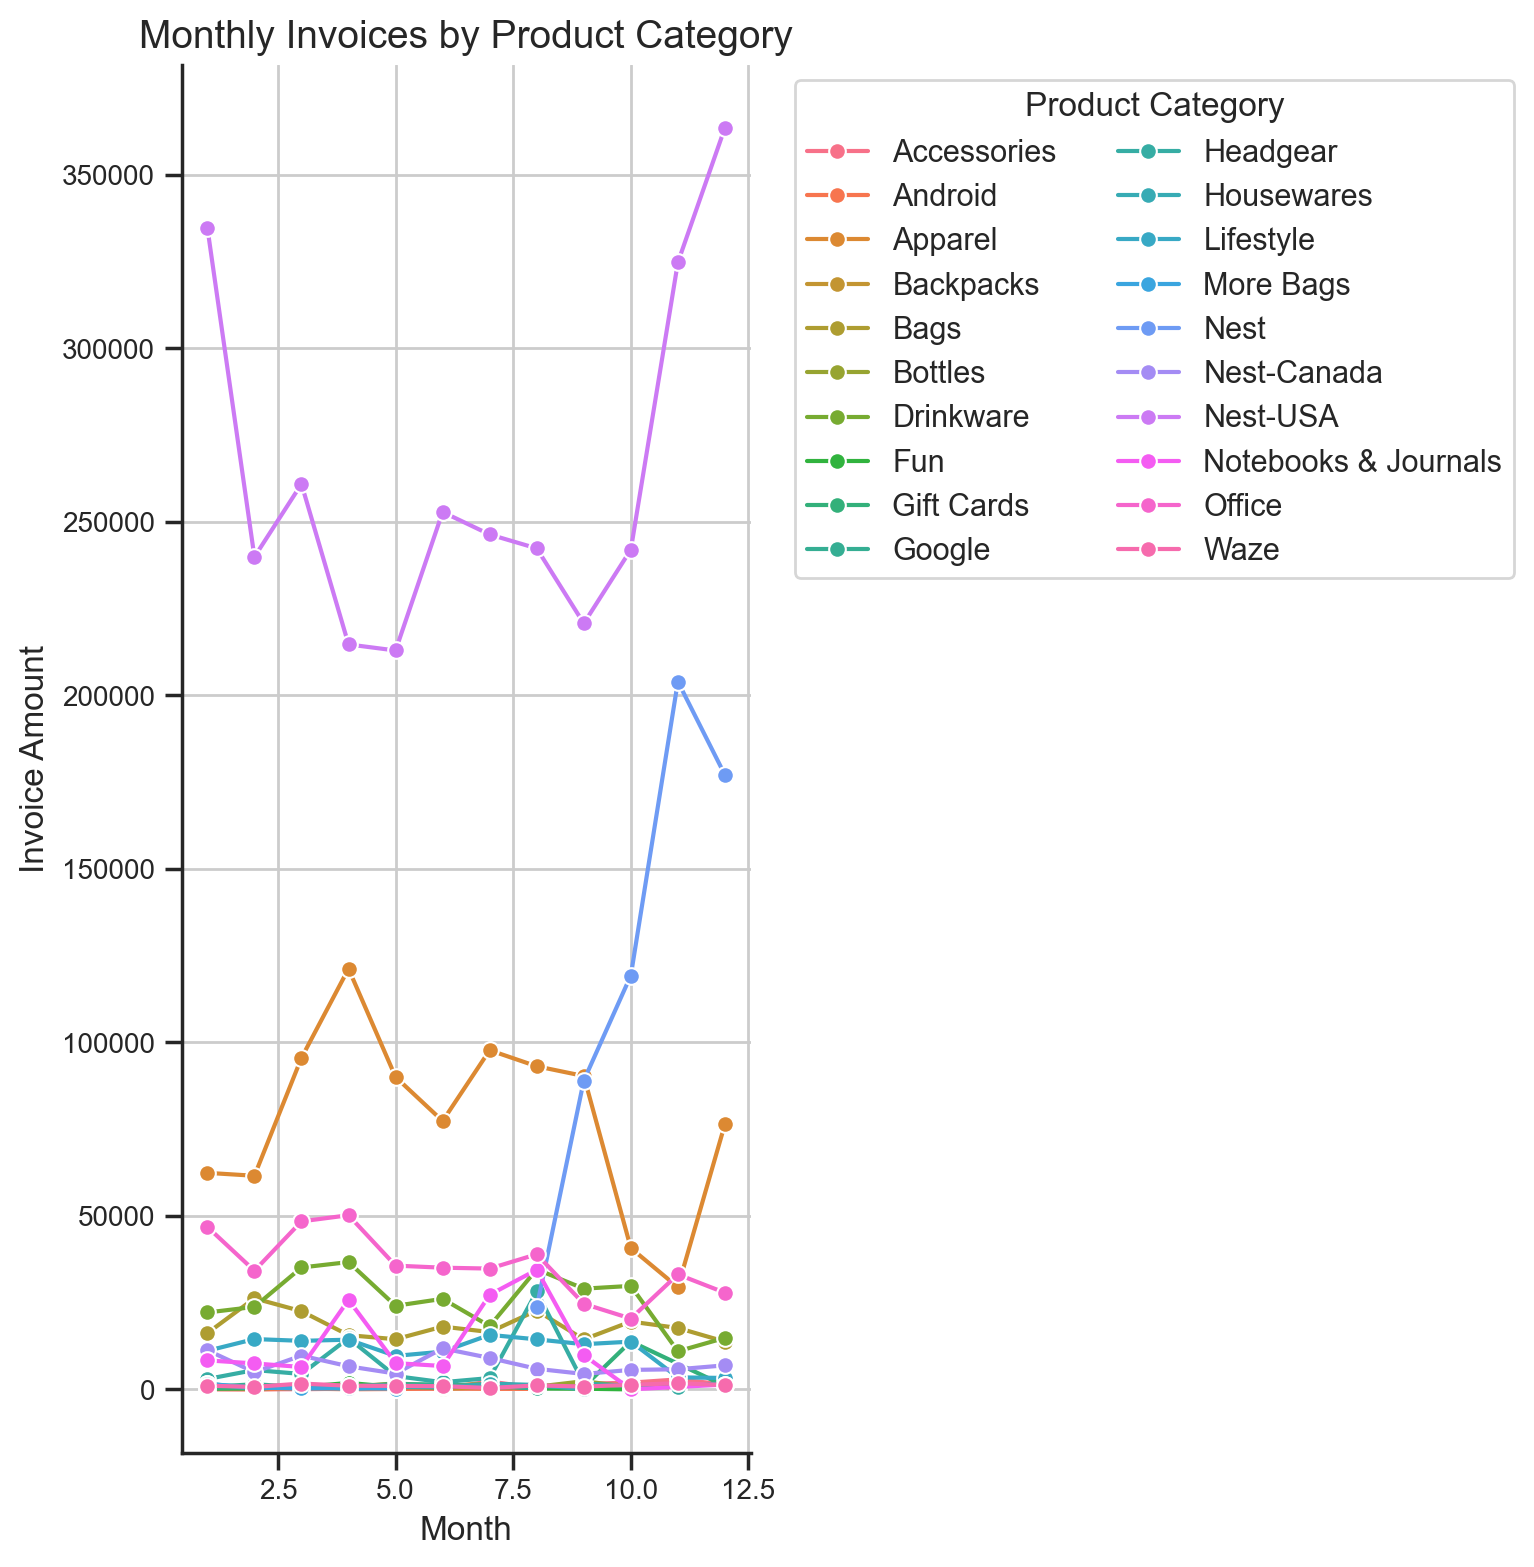

In [70]:
# Plotting the line graph
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.lineplot(data=invoice_categories, x='month', y='Invoice', hue='Product_Category', marker='o', ax=ax)

# Adding titles and labels
ax.set_title('Monthly Invoices by Product Category')
ax.set_xlabel('Month')
ax.set_ylabel('Invoice Amount')
ax.grid(True)

# Positioning the legend outside the plot area
legend = ax.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

# Show the boxplot
plt.tight_layout()
plt.show()

## 4. How many times was each products purchased?

In [71]:
## Data

amount_products = proportion_calc(data_tmp, 'Product_Description').sort_values('prop', ascending=False)
amount_products['cumulative'] = amount_products['prop'].cumsum()


print(f'There are {amount_products['Product_Description'].nunique()} differents products.')

There are 404 differents products.


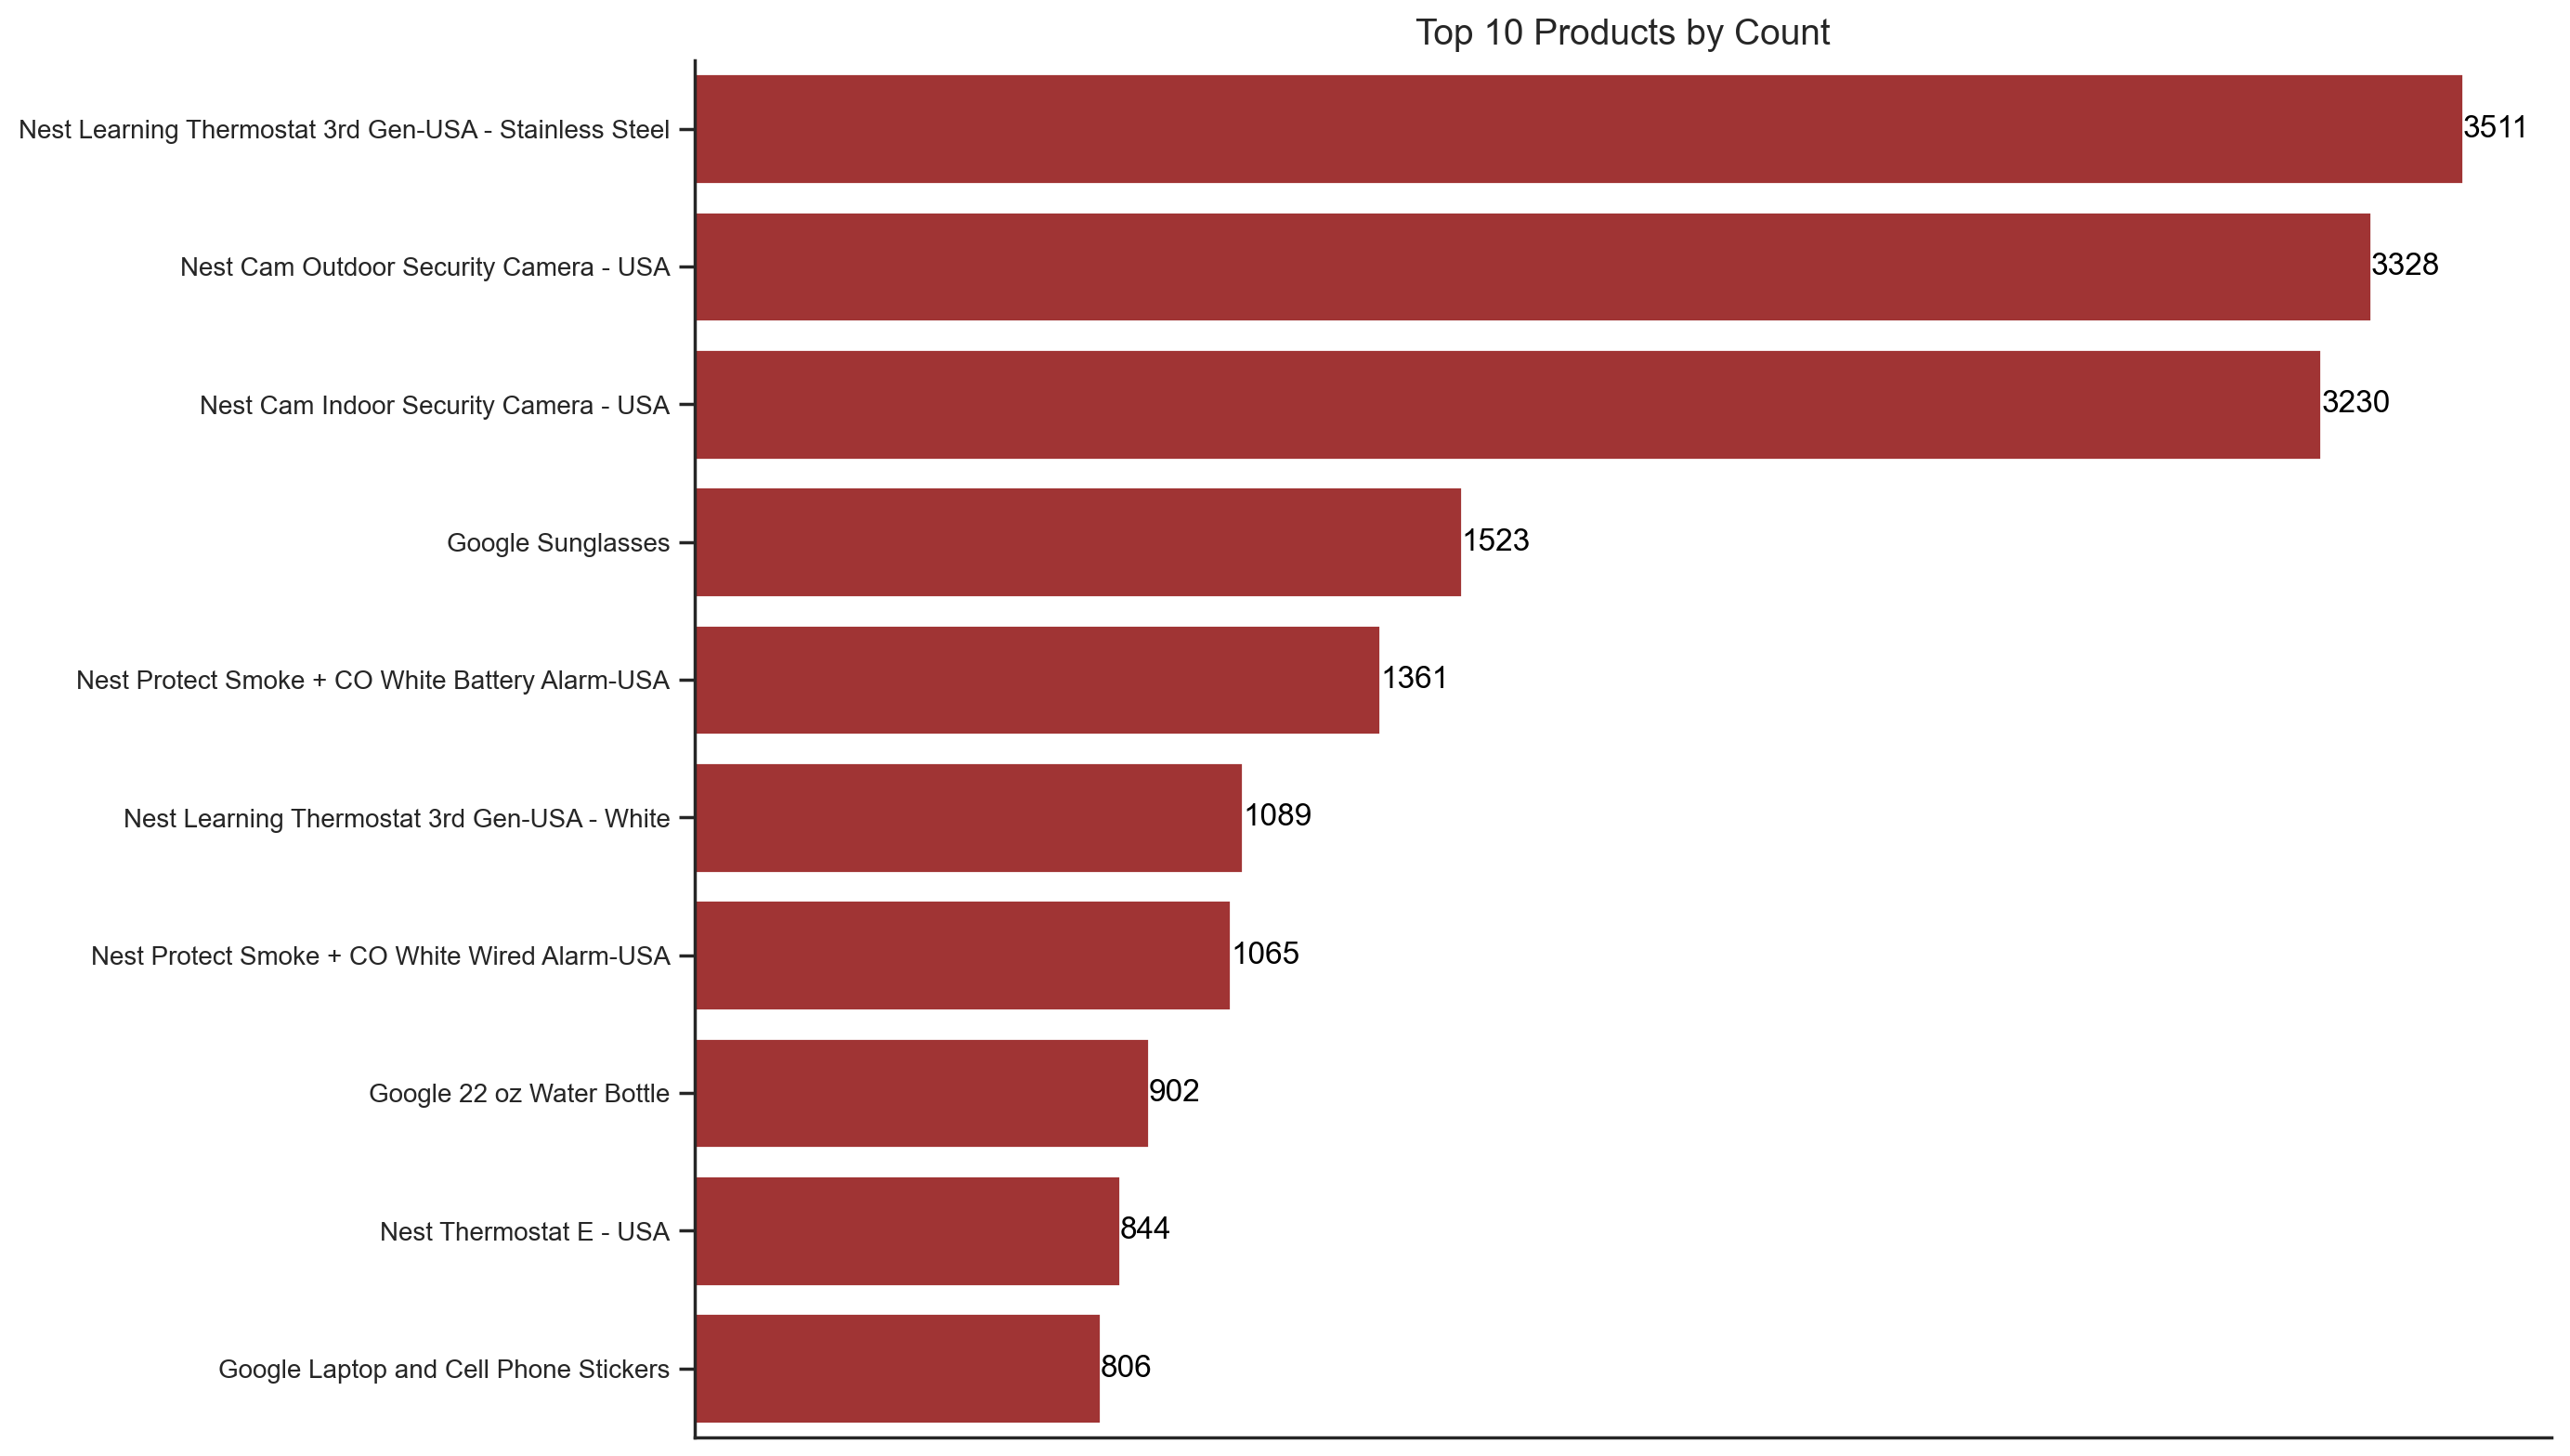

In [72]:
## Top 10

top_10_products = amount_products.nlargest(10, 'count')
# Define the color 
colors = ['firebrick' if value <= 80 else 'grey' for value in amount_products['cumulative']]

# Create the bar plot
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='count', y='Product_Description', data=top_10_products, palette=colors)

# Annotate the bars with the count values
for index, value in enumerate(top_10_products['count']):
    barplot.text(value, index, f'{value}', color='black', ha="left", va="center")

# Set the labels and title
# Set the labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('Top 10 Products by Count')

# Remove the x-axis ticks and labels
barplot.set_xticks([])

# Display the plot
plt.tight_layout()
plt.show()

## 5. Tenure

In [95]:
# Data

tenure_customer = data_tmp[['CustomerID','Quantity','Tenure_Months','Invoice','Transaction_ID']]
tenure_customer = tenure_customer.groupby('CustomerID').agg(
    tenure = ('Tenure_Months','min'),
    invoice_total = ('Invoice', 'sum'),
    qtde_items = ('Quantity','sum'),
    qtde_transactions = ('Transaction_ID','nunique')
).reset_index()

# Computing the correlation
tenure_customer.iloc[:,1:].corr()

,tenure,invoice_total,qtde_items,qtde_transactions
tenure,1.00,0.02,0.02,0.01
invoice_total,0.02,1.00,0.87,0.96
qtde_items,0.02,0.87,1.00,0.79
qtde_transactions,0.01,0.96,0.79,1.00


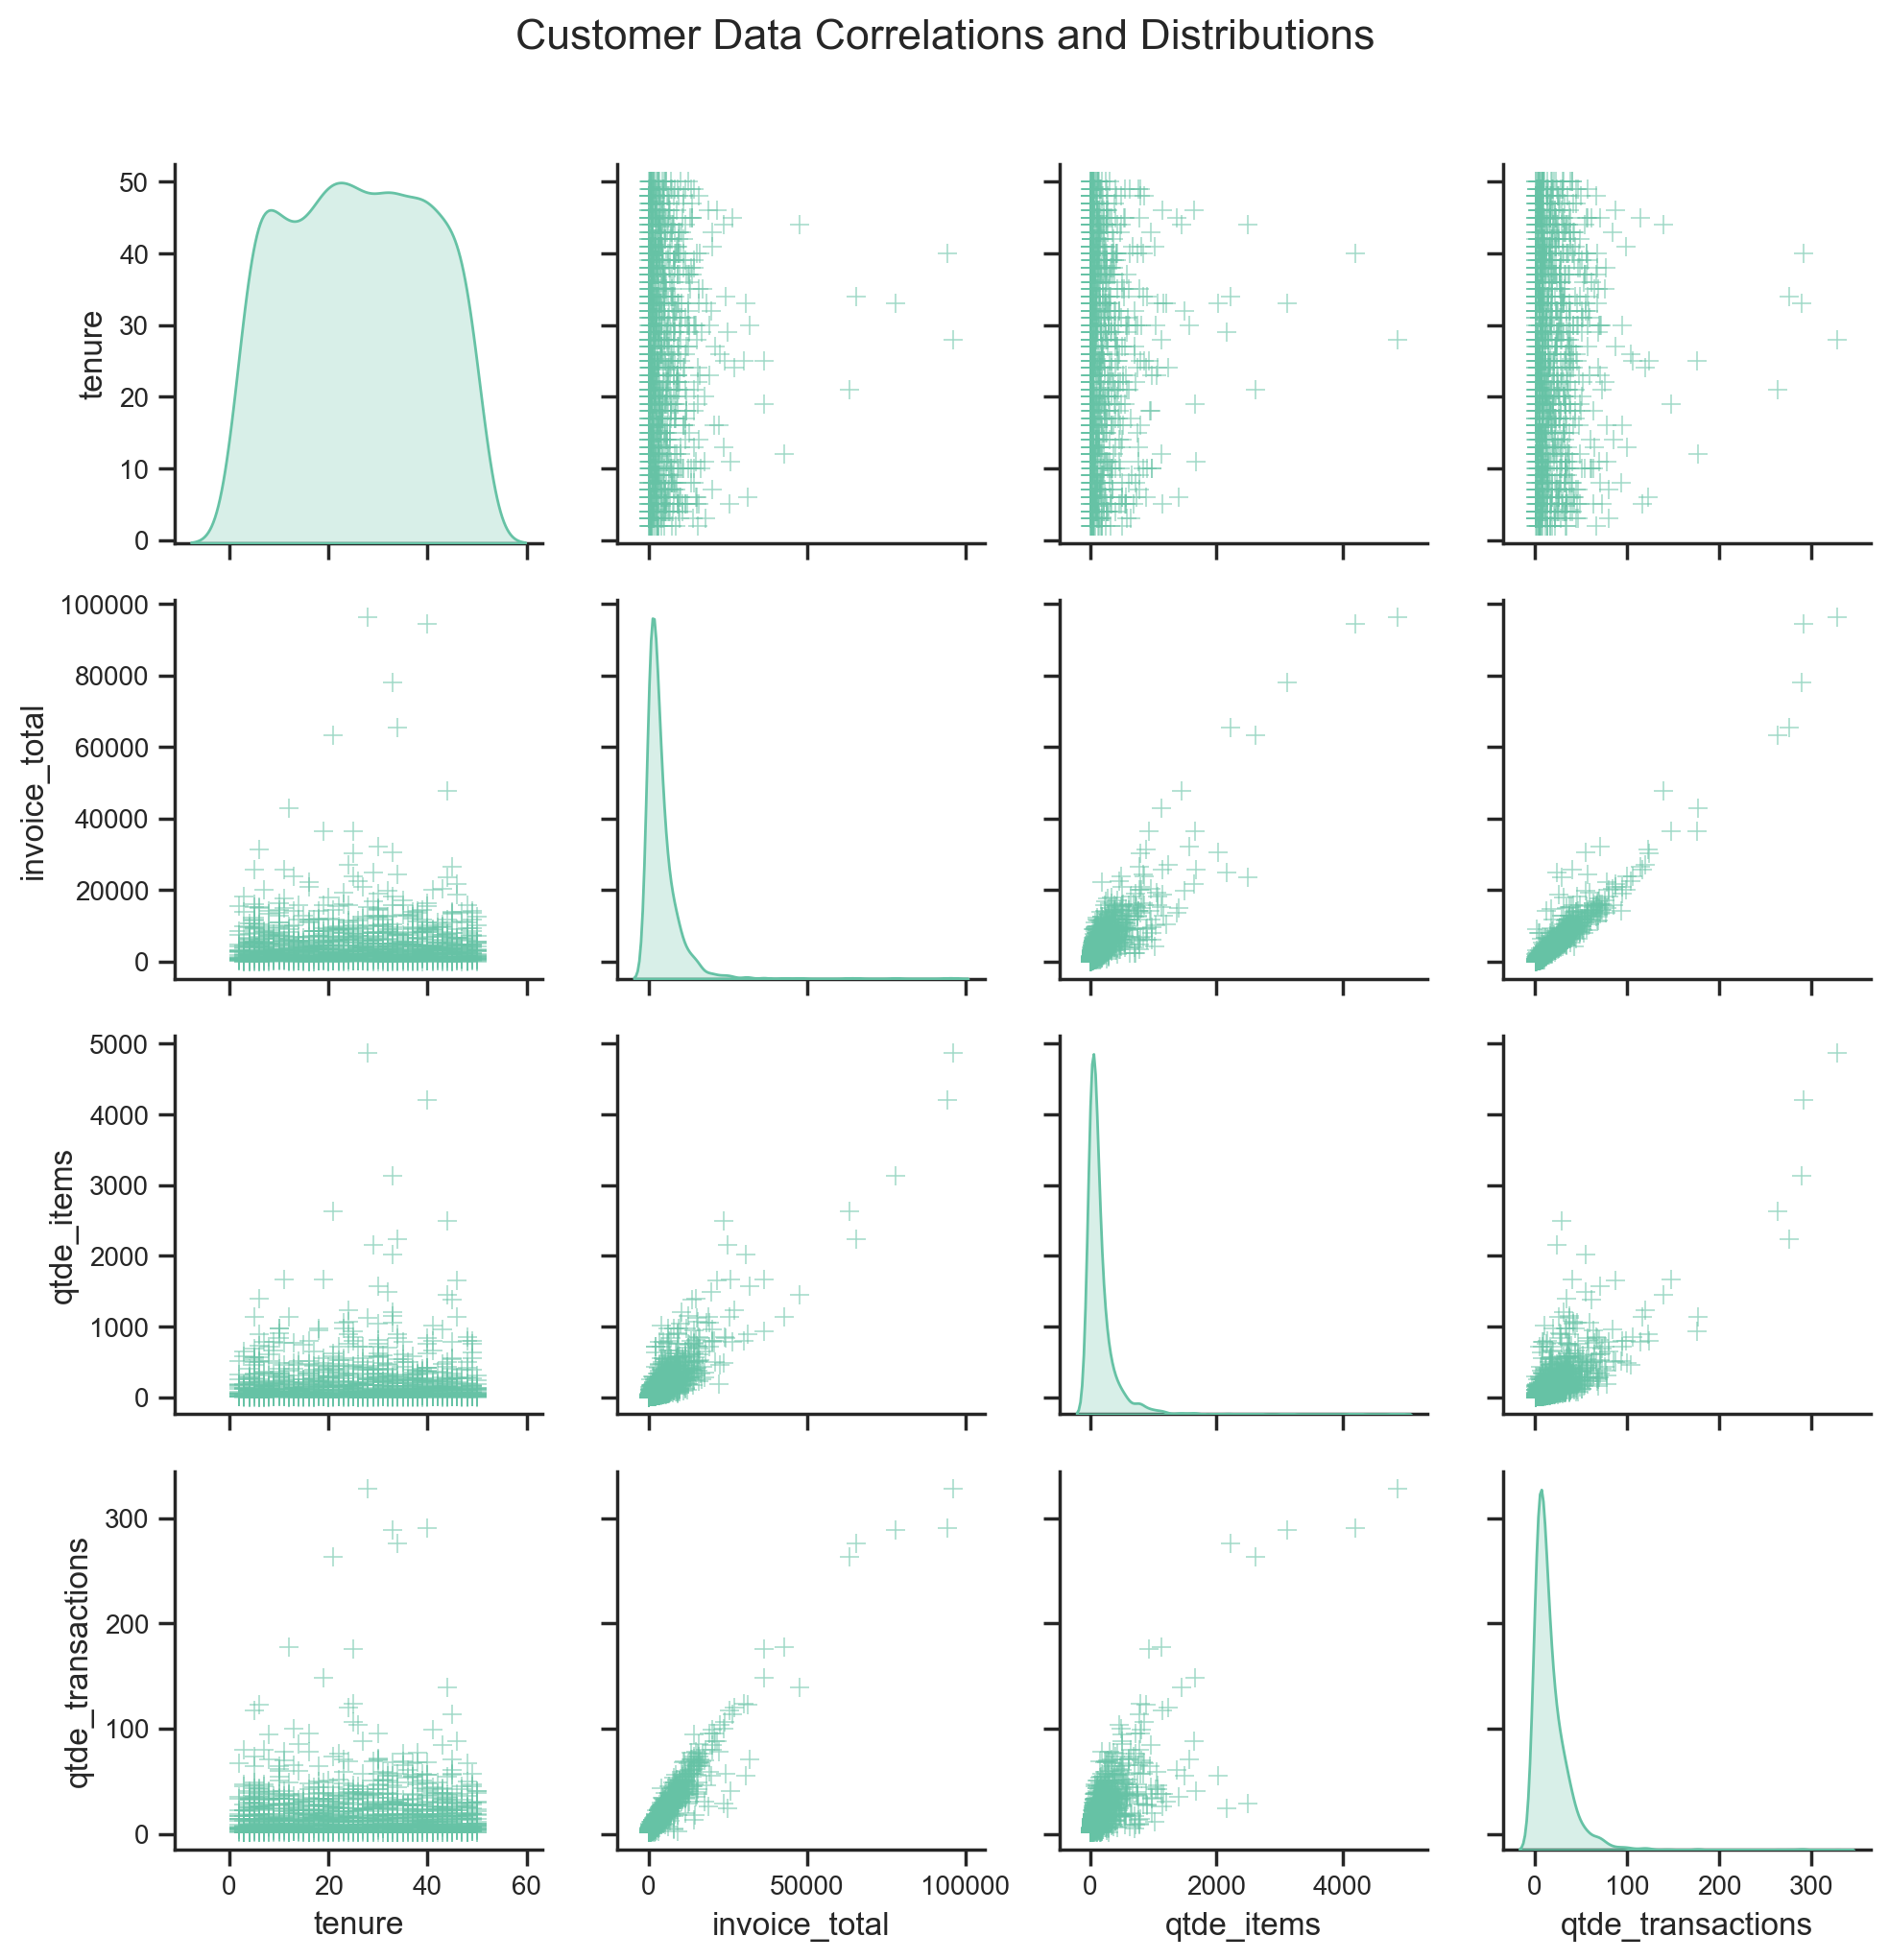

In [88]:
# Pairplot

df = pd.DataFrame(tenure_customer)
df.set_index('CustomerID', inplace=True)

# Customizing the pairplot
pairplot = sns.pairplot(
    df,
    diag_kind='kde',  # Use kernel density estimates for the diagonal
    markers='+',      # Marker style for the scatter plots
    plot_kws={'alpha': 0.6, 's': 50, 'edgecolor': 'k'},  # Scatter plot customizations
    diag_kws={'shade': True}  # Diagonal plot customizations
)

# Adding a title
pairplot.fig.suptitle('Customer Data Correlations and Distributions', y=1.02, fontsize=16)


plt.tight_layout()
plt.show()

In [74]:
data_tmp[data_tmp['CustomerID'] == 12346]

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Transaction_Date2,Month,Coupon_Code,Discount_pct,Discount_pct_ajus,Invoice,Gender,Location,Tenure_Months,month
38120,12346,38223,2019-09-15,GGOEAAAJ080816,Android Men's Engineer Short Sleeve Tee Charcoal,Apparel,1,19.99,75.00,Used,...,2019-09-15,Sep,SALE30,30.00,30.00,108.70,F,New York,31,9
38125,12346,38223,2019-09-15,GGOEGOAR013099,Google Stylus Pen w/ LED Light,Office,2,5.50,75.00,Used,...,2019-09-15,Sep,OFF30,30.00,30.00,92.29,F,New York,31,9
